In [4]:
%load_ext autoreload
%autoreload 2

from msr.training.data.datasets import PtbXLDataset
from msr.training.data.datamodules import PtbXLDataModule
from msr.training.trainers import MLClassifierTrainer
from msr.data.raw.ptbxl import FS

TARGET = "diagnostic_class"
BASE_PARAMS = dict(fs=FS, target=TARGET)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
rep_type = "whole_signal_features"
dm = PtbXLDataModule(rep_type, **BASE_PARAMS)
dm.setup()

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20)
ml_trainer = MLClassifierTrainer(model, dm)
ml_trainer.fit()

/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


{'accuracy': 0.7411693334579468, 'fscore': 0.5957897901535034, 'auroc': 0.8740595579147339, 'auc': 10.0}
{'accuracy': 0.7251815795898438, 'fscore': 0.5511376261711121, 'auroc': 0.8647304773330688, 'auc': 10.5}


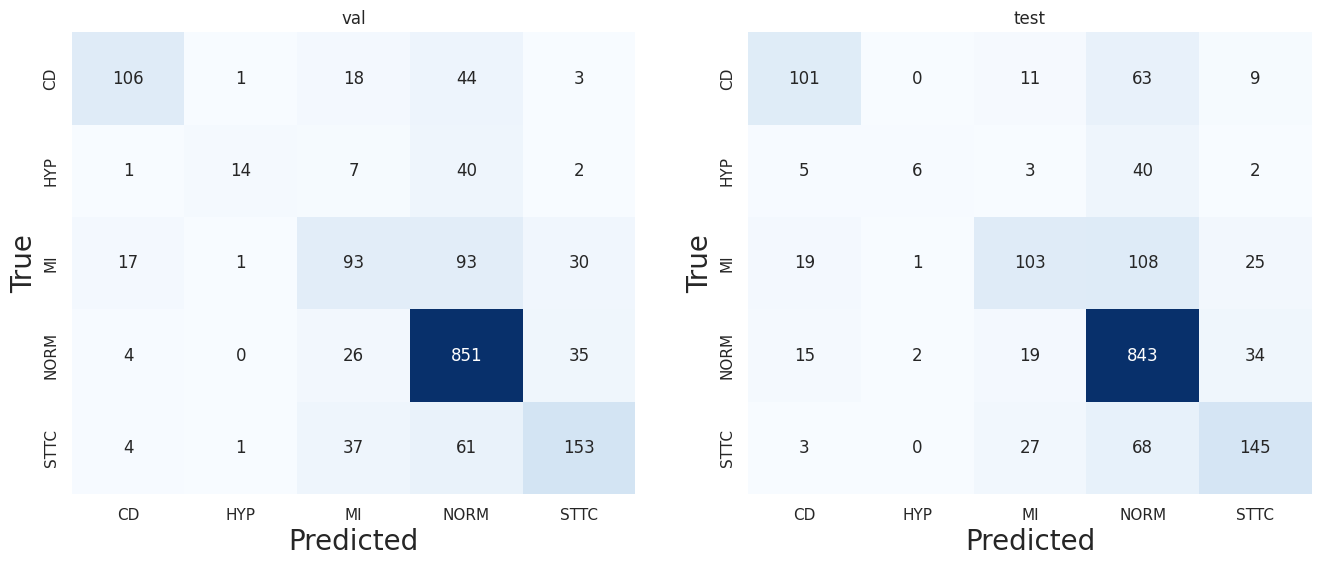

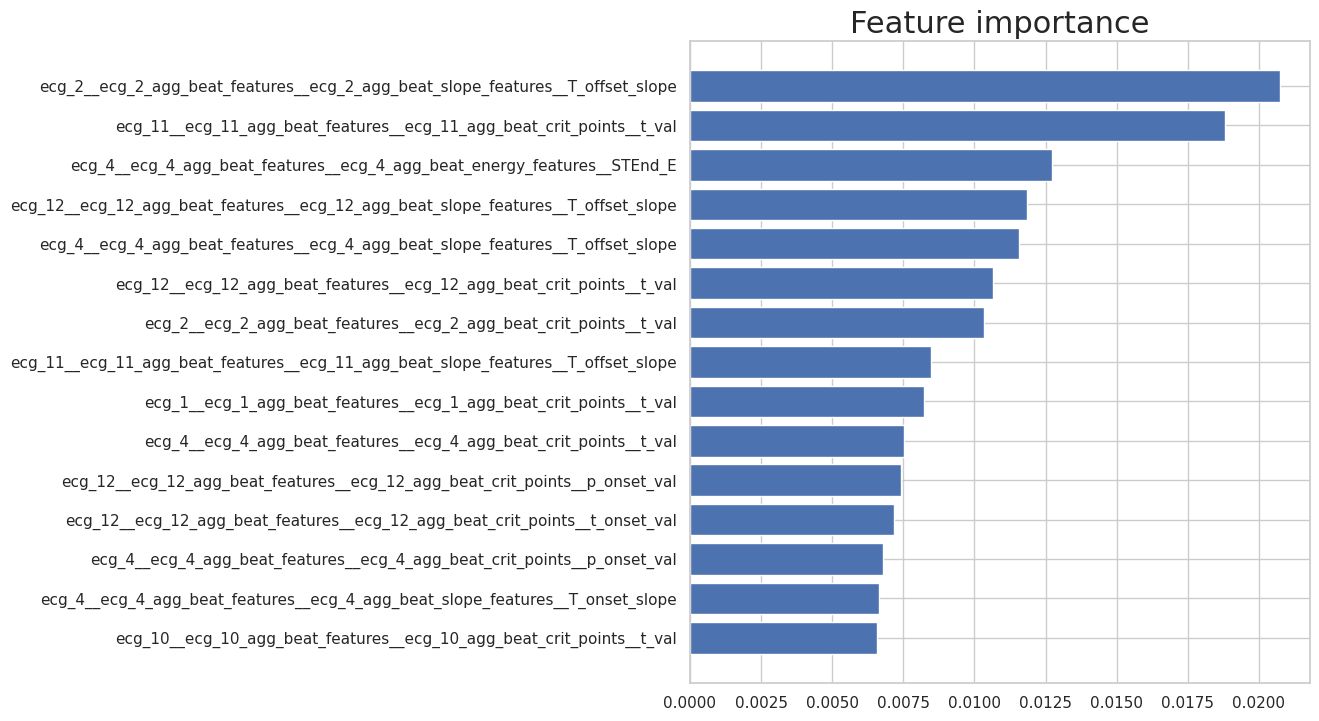

In [28]:
ml_trainer.evaluate(plot=True)